In [1]:
import numpy as np
import pandas as pd
import csv
Lines= []
f = open(r'CASE1_Disordered_208_Edited.txt')
for line in f:
    data_line = line.rstrip().split('\t')
    Lines.append(data_line)

In [2]:
len(Lines)

8585

In [3]:
ID=[]
IUPL_Score =[]
IUPS_Score =[]
Spot_Score =[]
Disorder_Annotation =[]
fMorf_Score =[]
DiordProt_Score =[]
ANCHOR_Score =[]
ProtBind_Annotation =[]
DiordRNA_Score =[]
RNABind_Annotation =[]
DiordDNA_Score =[]
DNABind_Annotation =[]
DFL_Score =[]
Linker_Annotation =[]
DMR_Score =[]
Moonlight_Annotation =[]
J = len(Lines)-16
b =0
for b in range(0,J, 17):
    ID.append(Lines[b])
    IUPL_Score.append(Lines[b+1])
    IUPS_Score.append(Lines[b+2])
    Spot_Score.append(Lines[b+3])
    Disorder_Annotation.append(Lines[b+4])
    fMorf_Score.append(Lines[b+5])
    DiordProt_Score.append(Lines[b+6])
    ANCHOR_Score.append(Lines[b+7])
    ProtBind_Annotation.append(Lines[b+8])
    DiordRNA_Score.append(Lines[b+9])
    RNABind_Annotation.append(Lines[b+10])
    DiordDNA_Score.append(Lines[b+11])
    DNABind_Annotation.append(Lines[b+12])
    DFL_Score.append(Lines[b+13])
    Linker_Annotation.append(Lines[b+14])
    DMR_Score.append(Lines[b+15])
    Moonlight_Annotation.append(Lines[b+16])

In [4]:
len(ID)

505

In [5]:
Bad_IDs=['>DP00070',
'>DP00151',
'>DP00217',
'>DP00397',
'>DP00422',
'>DP00555',
'>DP00570',
'>DP00620',
'>DP00630',
'>DP00668',
'>DP00673',
'>DP00724',
'>DP00725',
'>DP00787',
'>DP00810',
'>DP00839',
'>DP00899',
'>DP00902',
'>DP00941',
'>DP00944',
'>DP00966',
'>DP00986',
'>DP00990',
'>DP00998',
'>DP01024',
'>DP01029',
'>DP01038',
'>DP01055',
'>DP00702',
'>DP00253',
'>DP00130',
'>DP00057']

Good_IDs=[]
b =0
gbp=0
for b in range(0,261,1):
                if ID[b][0] in Bad_IDs: gbp=gbp+1
                else:Good_IDs.append(b)

In [6]:
len(Good_IDs)

229

In [7]:
ID[261][0]

'>5MGW_A_pdb'

In [8]:
New_Disorder_Annotation=[]
New_ProtBind_Annotation=[]
New_RNABind_Annotation=[]
New_DNABind_Annotation=[]
New_Linker_Annotation=[]
New_Moonlight_Annotation=[]
b =0
for b in Good_IDs:
             disorder=list(Disorder_Annotation[b][0])
             New_Disorder_Annotation.append(disorder)
             protein=list(ProtBind_Annotation[b][0])
             New_ProtBind_Annotation.append(protein)
             RNA=list(RNABind_Annotation[b][0])
             New_RNABind_Annotation.append(RNA)
             DNA=list(DNABind_Annotation[b][0])
             New_DNABind_Annotation.append(DNA)
             linker=list(Linker_Annotation[b][0])
             New_Linker_Annotation.append(linker)
             moon=list(Moonlight_Annotation[b][0])
             New_Moonlight_Annotation.append(moon)

b=0           
for b in range(261,len(ID),1): 
             disorder=list(Disorder_Annotation[b][0])
             New_Disorder_Annotation.append(disorder)
             protein=list(ProtBind_Annotation[b][0])
             New_ProtBind_Annotation.append(protein)
             RNA=list(RNABind_Annotation[b][0])
             New_RNABind_Annotation.append(RNA)
             DNA=list(DNABind_Annotation[b][0])
             New_DNABind_Annotation.append(DNA)
             linker=list(Linker_Annotation[b][0])
             New_Linker_Annotation.append(linker)
             moon=list(Moonlight_Annotation[b][0])
             New_Moonlight_Annotation.append(moon)

In [9]:
#Get the annotation count
Positive_Count=[]
Negative_Count=[]
Negative_Ratio=[]
for New_Disorder_Annotatio in New_Disorder_Annotation:
                 positive=0
                 negative=0
                 for b in range(0, len(New_Disorder_Annotatio), 1):
                                      if New_Disorder_Annotatio[b] == '1':positive = positive+1
                                      elif New_Disorder_Annotatio[b] == '0':negative = negative+1
                 Positive_Count.append(positive)
                 Negative_Count.append(negative)
                 Negative_Ratio.append(negative/len(New_Disorder_Annotatio))

In [10]:
#Add proteins from disprot section based on the Annotation count and everything from PDB set 
Filtered = []
Disprot_Index=[]
b =0
for b in range(0,len(Positive_Count),1):
              if Positive_Count[b]>0:
                                 Filtered.append(b)
                                 Disprot_Index.append(b)
Diso_Nega=[]
Diso_Ra=[]
for b in range(0,229,1):
              if Negative_Count[b]>0:
                                 Diso_Nega.append(b)
                                 Diso_Ra.append(Negative_Ratio[b])
Frame=pd.DataFrame({'Index':Diso_Nega,'Ratio':Diso_Ra})
Frame=Frame.sort_values(by='Ratio', ascending=False)
Diso_Nega=Frame.loc[:,('Index')].values
for b in range(229,473,1):
              Filtered.append(b)

In [11]:
len(Filtered)

460

In [12]:
len(Negative_Count)

473

In [13]:
check_DisorderAnnotation=[]
b=0
for b in Disprot_Index:
             check_DisorderAnnotation.append(New_Disorder_Annotation[b]) 
length_check=np.concatenate(check_DisorderAnnotation)
len(length_check)

79138

In [14]:
#Getting length of each protein to a list
Length_EachProtein = []
b=0
for b in range(0,len(New_Disorder_Annotation), 1):
                   c = len(New_Disorder_Annotation[b])
                   Length_EachProtein.append(c)

#Getting continous sum of all proteins to an array
d=np.cumsum(Length_EachProtein)

In [15]:
New_Disorder_Annotation=np.concatenate(New_Disorder_Annotation)
New_ProtBind_Annotation=np.concatenate(New_ProtBind_Annotation)  
New_RNABind_Annotation=np.concatenate(New_RNABind_Annotation)  
New_DNABind_Annotation=np.concatenate(New_DNABind_Annotation)  
New_Linker_Annotation=np.concatenate(New_Linker_Annotation)  
New_Moonlight_Annotation=np.concatenate(New_Moonlight_Annotation)  

In [16]:
len(New_Disorder_Annotation)

146527

In [17]:
New_IUPL_Score =[]
New_IUPS_Score =[]
New_Spot_Score =[]
New_fMorf_Score =[]
New_DiordProt_Score =[]
New_ANCHOR_Score =[]
New_DiordRNA_Score =[]
New_DiordDNA_Score =[]
New_DFL_Score =[]
New_DMR_Score =[]
b =0
for b in Good_IDs:
     iupl=IUPL_Score[b][0].rstrip().split(',')
     iupl=list(map(float, iupl))
     New_IUPL_Score.append(iupl)
     iups=IUPS_Score[b][0].rstrip().split(',')
     iups=list(map(float, iups))
     New_IUPS_Score.append(iups)
     spot=Spot_Score[b][0].rstrip().split(',')
     spot=list(map(float, spot))
     New_Spot_Score.append(spot)
     morf=fMorf_Score[b][0].rstrip().split(',')
     morf=list(map(float, morf))
     New_fMorf_Score.append(morf)
     disoprot=DiordProt_Score[b][0].rstrip().split(',')
     disoprot=list(map(float, disoprot))
     New_DiordProt_Score.append(disoprot)
     anchor=ANCHOR_Score[b][0].rstrip().split(',')
     anchor=list(map(float, anchor))
     New_ANCHOR_Score.append(anchor)
     disorna=DiordRNA_Score[b][0].rstrip().split(',')
     disorna=list(map(float, disorna))
     New_DiordRNA_Score.append(disorna)
     disodna=DiordDNA_Score[b][0].rstrip().split(',')
     disodna=list(map(float, disodna))
     New_DiordDNA_Score.append(disodna)
     dfl=DFL_Score[b][0].rstrip().split(',')
     dfl=list(map(float, dfl))
     New_DFL_Score.append(dfl)
     dmr=DMR_Score[b][0].rstrip().split(',')
     dmr=list(map(float, dmr))
     New_DMR_Score.append(dmr)



In [18]:
for b in range(261,len(ID),1):
     iupl=IUPL_Score[b][0].rstrip().split(',')
     iupl=list(map(float, iupl))
     New_IUPL_Score.append(iupl)
     iups=IUPS_Score[b][0].rstrip().split(',')
     iups=list(map(float, iups))
     New_IUPS_Score.append(iups)
     spot=Spot_Score[b][0].rstrip().split(',')
     spot=list(map(float, spot))
     New_Spot_Score.append(spot)
     morf=fMorf_Score[b][0].rstrip().split(',')
     morf=list(map(float, morf))
     New_fMorf_Score.append(morf)
     disoprot=DiordProt_Score[b][0].rstrip().split(',')
     disoprot=list(map(float, disoprot))
     New_DiordProt_Score.append(disoprot)
     anchor=ANCHOR_Score[b][0].rstrip().split(',')
     anchor=list(map(float, anchor))
     New_ANCHOR_Score.append(anchor)
     disorna=DiordRNA_Score[b][0].rstrip().split(',')
     disorna=list(map(float, disorna))
     New_DiordRNA_Score.append(disorna)
     disodna=DiordDNA_Score[b][0].rstrip().split(',')
     disodna=list(map(float, disodna))
     New_DiordDNA_Score.append(disodna)
     dfl=DFL_Score[b][0].rstrip().split(',')
     dfl=list(map(float, dfl))
     New_DFL_Score.append(dfl)
     dmr=DMR_Score[b][0].rstrip().split(',')
     dmr=list(map(float, dmr))
     New_DMR_Score.append(dmr)

In [19]:
New_IUPL_Score=np.concatenate(New_IUPL_Score)
New_IUPS_Score=np.concatenate(New_IUPS_Score)
New_Spot_Score=np.concatenate(New_Spot_Score)
New_fMorf_Score=np.concatenate(New_fMorf_Score)
New_DiordProt_Score=np.concatenate(New_DiordProt_Score)
New_ANCHOR_Score=np.concatenate(New_ANCHOR_Score)
New_DiordRNA_Score=np.concatenate(New_DiordRNA_Score)
New_DiordDNA_Score=np.concatenate(New_DiordDNA_Score)
New_DFL_Score=np.concatenate(New_DFL_Score)
New_DMR_Score=np.concatenate(New_DMR_Score)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler(feature_range=(0, 0.5))
scaler2 = MinMaxScaler(feature_range=(0.5, 1))

In [21]:
score_prediction= New_Spot_Score
Scaled_Spot_score =[]
score_prediction = np.asarray(score_prediction)
score_prediction = score_prediction.reshape(-1, 1)
scaler1.fit(score_prediction)
scaler2.fit(score_prediction)
b=0
for b in range(0, len(score_prediction), 1):

    if score_prediction[b] < 0.132: sca = scaler1.transform(score_prediction[b].reshape(1, -1))
    elif score_prediction[b] >= 0.132 : sca = scaler2.transform(score_prediction[b].reshape(1, -1))    
    Scaled_Spot_score.append(sca)
    
Scaled_Spot_score = np.concatenate(np.concatenate(Scaled_Spot_score))

In [22]:
score_prediction= New_IUPL_Score
Scaled_IUPL_score =[]
score_prediction = np.asarray(score_prediction)
score_prediction = score_prediction.reshape(-1, 1)
scaler1.fit(score_prediction)
scaler2.fit(score_prediction)
b=0
for b in range(0, len(score_prediction), 1):

    if score_prediction[b] < 0.4542: sca = scaler1.transform(score_prediction[b].reshape(1, -1))
    elif score_prediction[b] >= 0.4542 : sca = scaler2.transform(score_prediction[b].reshape(1, -1))    
    Scaled_IUPL_score.append(sca)
    
Scaled_IUPL_score = np.concatenate(np.concatenate(Scaled_IUPL_score))

In [23]:
score_prediction= New_IUPS_Score
Scaled_IUPS_score =[]
score_prediction = np.asarray(score_prediction)
score_prediction = score_prediction.reshape(-1, 1)
scaler1.fit(score_prediction)
scaler2.fit(score_prediction)
b=0
for b in range(0, len(score_prediction), 1):

    if score_prediction[b] < 0.446: sca = scaler1.transform(score_prediction[b].reshape(1, -1))
    elif score_prediction[b] >= 0.446 : sca = scaler2.transform(score_prediction[b].reshape(1, -1))    
    Scaled_IUPS_score.append(sca)
    
Scaled_IUPS_score = np.concatenate(np.concatenate(Scaled_IUPS_score))

In [24]:
randompred = New_IUPL_Score
IUPL_Binary= [] 
binary=0
b = 0
for b in range(0, len(randompred), 1):
    if randompred[b] >=0.4542: binary= 1 
    else: binary=0
    IUPL_Binary.append(binary)
sum(IUPL_Binary)

38101

In [25]:
randompred = New_IUPS_Score
IUPS_Binary= [] 
binary=0
b = 0
for b in range(0, len(randompred), 1):
    if randompred[b] >= 0.446: binary= 1 
    else: binary=0
    IUPS_Binary.append(binary)
sum(IUPS_Binary)

35667

In [26]:
randompred = New_Spot_Score
Spot_Binary= [] 
binary=0
b = 0
for b in range(0, len(randompred), 1):
    if randompred[b] >= 0.132: binary= 1 
    else: binary=0
    Spot_Binary.append(binary)
sum(Spot_Binary)

41148

In [27]:
Spot_PredictionScore=Scaled_Spot_score
Spot_BinaryPredictions=Spot_Binary
IUPL_PredictionScore=Scaled_IUPL_score
IUPL_BinaryPredictions=IUPL_Binary

In [28]:
Spot_PredictionScore_byProteins= np.split(Spot_PredictionScore,d)
Spot_BinaryPrediction_byProteins= np.split(Spot_BinaryPredictions,d)
IUPL_PredictionScore_byProteins= np.split(IUPL_PredictionScore,d)
IUPL_BinaryPrediction_byProteins= np.split(IUPL_BinaryPredictions,d)

In [29]:
import pandas as pd
file_training_set = (r"TestSet_Featuers_54.csv")
TestSet_Featuers = pd.read_csv(file_training_set)
TestSet_Featuers.head()

,Unnamed: 0,Spot_PredictionScore,Spot_BinaryPredictions,Spot_Prediction_ScoreWindow,Spot_Prediction_ScoreWindowWeighted,Spot_Prediction_ScoreWindowDiff,Spot_Binary_PredictionWindow,Spot_Binary_PredictionWindowWeighted,Spot_Binary_PredictionWindowDiff,Spot_Prediction_Score_Up,...,New_Score3Window,New_Score3WindowWeighted,New_Score3WindowDiff,New_Binary1,New_Binary1Window,New_Binary1WindowWeighted,New_Binary1WindowDiff,Terminal_Distance,Terminal_Distance10,Disorder_Annotation
0,0,0.986097,1,0.989701,0.164629,0.946550,1.0,0.166667,1.0,0.986097,...,0.873821,0.145105,0.893409,1,1.0,0.166667,1.0,0.000000,0,0
1,1,0.991761,1,0.988083,0.141459,0.926262,1.0,0.142857,1.0,0.986097,...,0.876169,0.125086,0.900892,1,1.0,0.142857,1.0,0.000342,1,0
2,2,0.993306,1,0.985453,0.123677,0.901133,1.0,0.125000,1.0,0.991761,...,0.877552,0.109481,0.916812,1,1.0,0.125000,1.0,0.000684,2,0
3,3,0.992276,1,0.981691,0.109618,0.871164,1.0,0.111111,1.0,0.993306,...,0.876259,0.097653,0.948556,1,1.0,0.111111,1.0,0.001026,3,0
4,4,0.989186,1,0.976468,0.098181,0.838414,1.0,0.100000,1.0,0.992276,...,0.878256,0.087583,0.985843,1,1.0,0.100000,1.0,0.001368,4,0


In [30]:
X_Initial = TestSet_Featuers.iloc[:,1:54]
X_Selected = TestSet_Featuers.iloc[:,([2,  3,  5,  7,  8, 12, 13, 16, 17, 18, 26, 27, 28, 29, 30, 31, 33])]

In [31]:
import pickle
import xgboost as xgb
filename = 'Consensus_Modeltx.sav'
Classifier_Overall = pickle.load(open(filename, 'rb'))
dall = xgb.DMatrix(X_Initial, label=New_Disorder_Annotation)
Con_Score9= Classifier_Overall.predict(dall)

In [32]:
#Split concatanated array back to proteins
New_fMorf_Score_byProteins= np.split(New_fMorf_Score,d)
New_DiordProt_Score_byProteins= np.split(New_DiordProt_Score,d)
New_ANCHOR_Score_byProteins= np.split(New_ANCHOR_Score,d)
New_DiordRNA_Score_byProteins= np.split(New_DiordRNA_Score,d)
New_DiordDNA_Score_byProteins= np.split(New_DiordDNA_Score,d)
New_DFL_Score_byProteins= np.split(New_DFL_Score,d)
New_DMR_Score_byProteins= np.split(New_DMR_Score,d)
#################################################################
New_Disorder_Annotation_byProteins= np.split(New_Disorder_Annotation,d)
New_ProtBind_Annotation_byProteins= np.split(New_ProtBind_Annotation,d)
New_RNABind_Annotation_byProteins= np.split(New_RNABind_Annotation,d)
New_DNABind_Annotation_byProteins= np.split(New_DNABind_Annotation,d)
New_Linker_Annotation_byProteins= np.split(New_Linker_Annotation ,d)
New_Moonlight_Annotation_byProteins= np.split(New_Moonlight_Annotation,d)

In [33]:
New_Disorder_Annotations=[]
New_ProtBind_Annotations=[]
New_RNABind_Annotations=[]
New_DNABind_Annotations=[]
New_Linker_Annotations=[] 
New_Moonlight_Annotations=[]
New_fMorf_Scores=[]
New_DiordProt_Scores=[]
New_ANCHOR_Scores=[]
New_DiordRNA_Scores=[]
New_DiordDNA_Scores=[]
New_DFL_Scores=[]
New_DMR_Scores=[]
b=0
for b in range(0,len(Negative_Count),1):
           New_Disorder_Annotations.append(New_Disorder_Annotation_byProteins[b])
           New_ProtBind_Annotations.append(New_ProtBind_Annotation_byProteins[b])
           New_RNABind_Annotations.append(New_RNABind_Annotation_byProteins[b])
           New_DNABind_Annotations.append(New_DNABind_Annotation_byProteins[b])
           New_Linker_Annotations.append(New_Linker_Annotation_byProteins[b]) 
           New_Moonlight_Annotations.append(New_Moonlight_Annotation_byProteins[b])
           New_fMorf_Scores.append(New_fMorf_Score_byProteins[b])
           New_DiordProt_Scores.append(New_DiordProt_Score_byProteins[b])
           New_ANCHOR_Scores.append(New_ANCHOR_Score_byProteins[b])
           New_DiordRNA_Scores.append(New_DiordRNA_Score_byProteins[b])
           New_DiordDNA_Scores.append(New_DiordDNA_Score_byProteins[b])
           New_DFL_Scores.append(New_DFL_Score_byProteins[b])
           New_DMR_Scores.append(New_DMR_Score_byProteins[b])   

In [34]:
New_Disorder_Annotations=np.concatenate(New_Disorder_Annotations)
New_ProtBind_Annotations=np.concatenate(New_ProtBind_Annotations)
New_RNABind_Annotations=np.concatenate(New_RNABind_Annotations)
New_DNABind_Annotations=np.concatenate(New_DNABind_Annotations)
New_Linker_Annotations=np.concatenate(New_Linker_Annotations)
New_Moonlight_Annotations=np.concatenate(New_Moonlight_Annotations)
New_fMorf_Scores=np.concatenate(New_fMorf_Scores)
New_DiordProt_Scores=np.concatenate(New_DiordProt_Scores)
New_ANCHOR_Scores=np.concatenate(New_ANCHOR_Scores)
New_DiordRNA_Scores=np.concatenate(New_DiordRNA_Scores)
New_DiordDNA_Scores=np.concatenate(New_DiordDNA_Scores)
New_DFL_Scores=np.concatenate(New_DFL_Scores)
New_DMR_Scores=np.concatenate(New_DMR_Scores)

In [35]:
Y_New_Disorder_Annotations =[]
b=0
for b in range(0,len(New_Disorder_Annotations), 1):
    if New_Disorder_Annotations[b]== 'x':Y_New_Disorder_Annotations.append('0')
    else: Y_New_Disorder_Annotations.append(New_Disorder_Annotations[b])

Y_New_ProtBind_Annotations=[]
b=0
for b in range(0,len(New_ProtBind_Annotations), 1):
    if New_ProtBind_Annotations[b]== 'x':Y_New_ProtBind_Annotations.append('0')
    else: Y_New_ProtBind_Annotations.append(New_ProtBind_Annotations[b])

Y_New_RNABind_Annotations=[]
b=0
for b in range(0,len(New_RNABind_Annotations), 1):
    if New_RNABind_Annotations[b]== 'x':Y_New_RNABind_Annotations.append('0')
    else: Y_New_RNABind_Annotations.append(New_RNABind_Annotations[b])
        
Y_New_DNABind_Annotations =[]
b=0
for b in range(0,len(New_DNABind_Annotations), 1):
    if New_DNABind_Annotations[b]== 'x':Y_New_DNABind_Annotations.append('0')
    else: Y_New_DNABind_Annotations.append(New_DNABind_Annotations[b])
        
Y_New_Linker_Annotations =[]
b=0
for b in range(0,len(New_Linker_Annotations), 1):
    if New_Linker_Annotations[b]== 'x':Y_New_Linker_Annotations.append('0')
    else: Y_New_Linker_Annotations.append(New_Linker_Annotations[b])
        
Y_New_Moonlight_Annotations =[]
b=0
for b in range(0,len(New_Moonlight_Annotations), 1):
    if New_Moonlight_Annotations[b]== 'x':Y_New_Moonlight_Annotations.append('0')
    else: Y_New_Moonlight_Annotations.append(New_Moonlight_Annotations[b])

In [36]:
Positive_Index_Disorder =[]
b=0
for b in range(0,len(Y_New_Disorder_Annotations), 1):
    if Y_New_Disorder_Annotations[b]=='1':Positive_Index_Disorder.append(b)

Positive_Index_Protein =[]
b=0
for b in range(0,len(Y_New_ProtBind_Annotations), 1):
    if Y_New_ProtBind_Annotations[b]=='1':Positive_Index_Protein.append(b)

Positive_Index_RNA =[]
b=0
for b in range(0,len(Y_New_RNABind_Annotations), 1):
    if Y_New_RNABind_Annotations[b]=='1':Positive_Index_RNA.append(b)
        
Positive_Index_DNA =[]
b=0
for b in range(0,len(Y_New_DNABind_Annotations), 1):
    if Y_New_DNABind_Annotations[b]=='1':Positive_Index_DNA.append(b)
        
Positive_Index_Linker =[]
b=0
for b in range(0,len(Y_New_Linker_Annotations), 1):
    if Y_New_Linker_Annotations[b]=='1':Positive_Index_Linker.append(b)
        
Positive_Index_Moon =[]
b=0
for b in range(0,len(Y_New_Moonlight_Annotations), 1):
    if Y_New_Moonlight_Annotations[b]=='1':Positive_Index_Moon.append(b)

In [37]:
HardNegative_Index_Disorder =[]
b=0
for b in range(0,len(length_check), 1):
    if Y_New_Disorder_Annotations[b]=='0':HardNegative_Index_Disorder.append(b)

HardNegative_Index_Protein =[]
b=0
for b in range(0,len(length_check), 1):
    if Y_New_ProtBind_Annotations[b]=='0':HardNegative_Index_Protein.append(b)

HardNegative_Index_RNA =[]
b=0
for b in range(0,len(length_check), 1):
    if Y_New_RNABind_Annotations[b]=='0':HardNegative_Index_RNA.append(b)
        
HardNegative_Index_DNA =[]
b=0
for b in range(0,len(length_check), 1):
    if Y_New_DNABind_Annotations[b]=='0':HardNegative_Index_DNA.append(b)
        
HardNegative_Index_Linker =[]
b=0
for b in range(0,len(length_check), 1):
    if Y_New_Linker_Annotations[b]=='0':HardNegative_Index_Linker.append(b)
        
HardNegative_Index_Moon =[]
b=0
for b in range(0,len(length_check), 1):
    if Y_New_Moonlight_Annotations[b]=='0':HardNegative_Index_Moon.append(b)

In [38]:
EasyNegative_Index_Disorder =[]
b=0
for b in range(len(length_check),len(Y_New_Disorder_Annotations),1):
    if Y_New_Disorder_Annotations[b]=='0':EasyNegative_Index_Disorder.append(b)

EasyNegative_Index_Protein =[]
b=0
for b in range(len(length_check),len(Y_New_ProtBind_Annotations),1):
    if Y_New_ProtBind_Annotations[b]=='0':EasyNegative_Index_Protein.append(b)

EasyNegative_Index_RNA =[]
b=0
for b in range(len(length_check),len(Y_New_RNABind_Annotations),1):
    if Y_New_RNABind_Annotations[b]=='0':EasyNegative_Index_RNA.append(b)
        
EasyNegative_Index_DNA =[]
b=0
for b in range(len(length_check),len(Y_New_DNABind_Annotations),1):
    if Y_New_DNABind_Annotations[b]=='0':EasyNegative_Index_DNA.append(b)
        
EasyNegative_Index_Linker =[]
b=0
for b in range(len(length_check),len(Y_New_Linker_Annotations),1):
    if Y_New_Linker_Annotations[b]=='0':EasyNegative_Index_Linker.append(b)
        
EasyNegative_Index_Moon =[]
b=0
for b in range(len(length_check),len(Y_New_Moonlight_Annotations),1):
    if Y_New_Moonlight_Annotations[b]=='0':EasyNegative_Index_Moon.append(b)

In [39]:
print(len(Positive_Index_Disorder))
print(len(HardNegative_Index_Disorder))
print(len(EasyNegative_Index_Disorder))
len(New_Disorder_Annotations)

20705
58903
66919


146527

In [40]:
Index_Disorder=Positive_Index_Disorder+HardNegative_Index_Disorder[:2*len(Positive_Index_Disorder)]+EasyNegative_Index_Disorder[:2*len(Positive_Index_Disorder)]
Index_Protein=Positive_Index_Protein+HardNegative_Index_Protein[:len(Positive_Index_Protein)]+EasyNegative_Index_Protein[:len(Positive_Index_Protein)]
Index_RNA=Positive_Index_RNA+HardNegative_Index_RNA[:len(Positive_Index_RNA)]+EasyNegative_Index_RNA[:len(Positive_Index_RNA)]
Index_DNA=Positive_Index_DNA+HardNegative_Index_DNA[:len(Positive_Index_DNA)]+EasyNegative_Index_DNA[:len(Positive_Index_DNA)]
Index_Linker=Positive_Index_Linker+HardNegative_Index_Linker[:len(Positive_Index_Linker)]+EasyNegative_Index_Linker[:len(Positive_Index_Linker)]
Index_Moon=Positive_Index_Moon+HardNegative_Index_Moon[:len(Positive_Index_Moon)]+EasyNegative_Index_Moon[:len(Positive_Index_Moon)]

In [41]:
len(Index_Disorder)

103525

In [42]:
Puri_Disorder=[]
Puri_IUPL=[]
Puri_IUPS=[]
Puri_Spot=[]
Puri_Consensus=[]
b=0
for b in Index_Disorder:
    Puri_Disorder.append(Y_New_Disorder_Annotations[b])
    Puri_IUPL.append(New_IUPL_Score[b])
    Puri_IUPS.append(New_IUPS_Score[b])
    Puri_Spot.append(New_Spot_Score[b])
    Puri_Consensus.append(Con_Score9[b])
    
Puri_Disorder =list(map(int, Puri_Disorder))

In [43]:
sum(Puri_Disorder)

20705

In [44]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, accuracy_score, average_precision_score, confusion_matrix
c = Puri_Disorder
randompred = Puri_IUPL
bin_pred= [] 
binary=0
b = 0
for b in range(0, len(randompred), 1):
    if randompred[b] > 0.51000000: binary= 1 
    else: binary=0
    bin_pred.append(binary)
res = pd.DataFrame(columns=['AUC','PR','ACC','Sen','Spec','MCC'], index=[0])
res.loc[0, 'AUC'] = roc_auc_score(c, randompred)
res.loc[0, 'PR'] = average_precision_score(c, randompred)
cm = confusion_matrix(c, bin_pred)
res.loc[0, 'ACC'] = accuracy_score(c, bin_pred)  
res.loc[0, 'Sen'] = cm[1,1] / float (cm[1,0]+cm[1,1])
res.loc[0, 'Spec'] = cm[0,0] / float (cm[0,0]+cm[0,1])
res.loc[0, 'MCC'] = matthews_corrcoef(c, bin_pred)
res.astype(float).round(3)

,AUC,PR,ACC,Sen,Spec,MCC
0,0.804,0.525,0.808,0.623,0.854,0.446


In [45]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, accuracy_score, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
c = Puri_Disorder
randompred =  Puri_IUPL
MCC=[]
Threshold=[]
k=0
threshold=0
for k in range(0,200,1):
       Threshold.append(threshold)
       bin_pred= [] 
       binary=0
       b = 0
       for b in range(0, len(randompred), 1):
           if randompred[b] >= threshold: binary= 1 
           else: binary=0
           bin_pred.append(binary)
       MCC.append(matthews_corrcoef(c,bin_pred))
       threshold=threshold+0.005

maxpos = MCC.index(max(MCC))
Threshold[maxpos]

C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


0.5100000000000003

In [46]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, accuracy_score, average_precision_score, confusion_matrix
c = Puri_Disorder
randompred = Puri_IUPS
bin_pred= [] 
binary=0
b = 0
for b in range(0, len(randompred), 1):
    if randompred[b] > 0.435000: binary= 1 
    else: binary=0
    bin_pred.append(binary)
res = pd.DataFrame(columns=['AUC','PR','ACC','Sen','Spec','MCC'], index=[0])
res.loc[0, 'AUC'] = roc_auc_score(c, randompred)
res.loc[0, 'PR'] = average_precision_score(c, randompred)
cm = confusion_matrix(c, bin_pred)
res.loc[0, 'ACC'] = accuracy_score(c, bin_pred)  
res.loc[0, 'Sen'] = cm[1,1] / float (cm[1,0]+cm[1,1])
res.loc[0, 'Spec'] = cm[0,0] / float (cm[0,0]+cm[0,1])
res.loc[0, 'MCC'] = matthews_corrcoef(c, bin_pred)
res.astype(float).round(3)

,AUC,PR,ACC,Sen,Spec,MCC
0,0.791,0.485,0.779,0.665,0.807,0.418


In [47]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, accuracy_score, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
c = Puri_Disorder
randompred =  Puri_IUPS
MCC=[]
Threshold=[]
k=0
threshold=0
for k in range(0,200,1):
       Threshold.append(threshold)
       bin_pred= [] 
       binary=0
       b = 0
       for b in range(0, len(randompred), 1):
           if randompred[b] >= threshold: binary= 1 
           else: binary=0
           bin_pred.append(binary)
       MCC.append(matthews_corrcoef(c,bin_pred))
       threshold=threshold+0.005

maxpos = MCC.index(max(MCC))
Threshold[maxpos]

0.4350000000000003

In [48]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, accuracy_score, average_precision_score, confusion_matrix
c = Puri_Disorder
randompred = Puri_Spot
bin_pred= [] 
binary=0
b = 0
for b in range(0, len(randompred), 1):
    if randompred[b] >0.2100000: binary= 1 
    else: binary=0
    bin_pred.append(binary)
res = pd.DataFrame(columns=['AUC','PR','ACC','Sen','Spec','MCC'], index=[0])
res.loc[0, 'AUC'] = roc_auc_score(c, randompred)
res.loc[0, 'PR'] = average_precision_score(c, randompred)
cm = confusion_matrix(c, bin_pred)
res.loc[0, 'ACC'] = accuracy_score(c, bin_pred)  
res.loc[0, 'Sen'] = cm[1,1] / float (cm[1,0]+cm[1,1])
res.loc[0, 'Spec'] = cm[0,0] / float (cm[0,0]+cm[0,1])
res.loc[0, 'MCC'] = matthews_corrcoef(c, bin_pred)
res.astype(float).round(3)

,AUC,PR,ACC,Sen,Spec,MCC
0,0.845,0.585,0.808,0.716,0.83,0.487


In [49]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, accuracy_score, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
c = Puri_Disorder
randompred =  Puri_Spot
MCC=[]
Threshold=[]
k=0
threshold=0
for k in range(0,200,1):
       Threshold.append(threshold)
       bin_pred= [] 
       binary=0
       b = 0
       for b in range(0, len(randompred), 1):
           if randompred[b] >= threshold: binary= 1 
           else: binary=0
           bin_pred.append(binary)
       MCC.append(matthews_corrcoef(c,bin_pred))
       threshold=threshold+0.005

maxpos = MCC.index(max(MCC))
Threshold[maxpos]

0.2100000000000001

In [50]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, accuracy_score, average_precision_score, confusion_matrix
c = Puri_Disorder
randompred = Puri_Consensus
bin_pred= [] 
binary=0
b = 0
for b in range(0, len(randompred), 1):
    if randompred[b] >= 0.045: binary= 1 
    else: binary=0
    bin_pred.append(binary)
res = pd.DataFrame(columns=['AUC','PR','ACC','Sen','Spec','MCC'], index=[0])
res.loc[0, 'AUC'] = roc_auc_score(c, randompred)
res.loc[0, 'PR'] = average_precision_score(c, randompred)
cm = confusion_matrix(c, bin_pred)
res.loc[0, 'ACC'] = accuracy_score(c, bin_pred)  
res.loc[0, 'Sen'] = cm[1,1] / float (cm[1,0]+cm[1,1])
res.loc[0, 'Spec'] = cm[0,0] / float (cm[0,0]+cm[0,1])
res.loc[0, 'MCC'] = matthews_corrcoef(c,bin_pred)
res.astype(float).round(3)

,AUC,PR,ACC,Sen,Spec,MCC
0,0.851,0.609,0.82,0.712,0.847,0.507


In [51]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, accuracy_score, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
c = Puri_Disorder
randompred = Puri_Consensus
MCC=[]
Threshold=[]
k=0
threshold=0
for k in range(0,200,1):
       Threshold.append(threshold)
       bin_pred= [] 
       binary=0
       b = 0
       for b in range(0, len(randompred), 1):
           if randompred[b] >= threshold: binary= 1 
           else: binary=0
           bin_pred.append(binary)
       MCC.append(matthews_corrcoef(c,bin_pred))
       threshold=threshold+0.005

maxpos = MCC.index(max(MCC))
Threshold[maxpos]

0.045

In [52]:
maxpos = MCC.index(max(MCC))
Threshold[maxpos]

0.045

In [53]:
import statistics
IUPL_PosScore= [] 
IUPL_NegScore= [] 
b = 0
for b in range(0, len(Puri_Disorder), 1):
    if Puri_Disorder[b]==1:IUPL_PosScore.append(Puri_IUPL[b])
    else:IUPL_NegScore.append(Puri_IUPL[b])
IUPL_Posmedian=statistics.median(IUPL_PosScore)
IUPL_Negmedian=statistics.median(IUPL_NegScore)
IUPL_Threshold = (IUPL_Posmedian+IUPL_Negmedian)/2
len(IUPL_PosScore)/len(IUPL_NegScore)

0.25

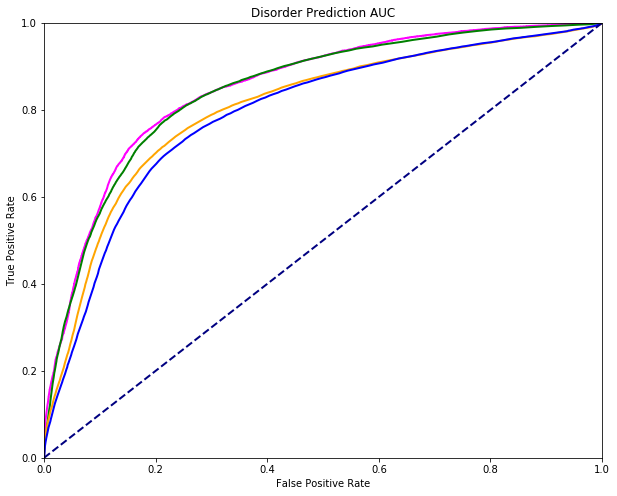

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fig = plt.figure(figsize=(10,8))
lw = 2
###############################################################################################################################
Score =np.array(Puri_Consensus,dtype=np.float)
c=np.array(c,dtype=np.float)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(c, Score)
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(c.ravel(), Score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr[1], tpr[1], color='magenta',
         lw=lw, label='Disorder Consensus Model (area = %0.3f)' % 0.853)
##############################################################################################################################
ScoreAn =np.array(Puri_Spot,dtype=np.float)
c=np.array(c,dtype=np.float)
fprAn = dict()
tprAn = dict()
roc_aucAn = dict()
for i in range(2):
    fprAn[i], tprAn[i], _ = roc_curve(c, ScoreAn)
    roc_aucAn[i] = auc(fprAn[i], tprAn[i])
# Compute micro-average ROC curve and ROC area
fprAn["micro"], tprAn["micro"], _ = roc_curve(c.ravel(), ScoreAn.ravel())
roc_aucAn["micro"] = auc(fprAn["micro"], tprAn["micro"])
plt.plot(fprAn[1], tprAn[1], color='g',
         lw=lw, label='SPOT Disorder(area = %0.3f)' % roc_aucAn[1])
################################################################################################################################
ScoreDp =np.array(Puri_IUPL,dtype=np.float)
c=np.array(c,dtype=np.float)
fprDp = dict()
tprDp = dict()
roc_aucDp = dict()
for i in range(2):
    fprDp[i], tprDp[i], _ = roc_curve(c, ScoreDp)
    roc_aucDp[i] = auc(fprDp[i], tprDp[i])
# Compute micro-average ROC curve and ROC area
fprDp["micro"], tprDp["micro"], _ = roc_curve(c.ravel(), ScoreDp.ravel())
roc_aucDp["micro"] = auc(fprDp["micro"], tprDp["micro"])
plt.plot(fprDp[1], tprDp[1], color='orange',
         lw=lw, label='IUPRED LONG(area = %0.3f)' % roc_aucDp[1])
##############################################################################################################################
ScoreDp =np.array(Puri_IUPS,dtype=np.float)
c=np.array(c,dtype=np.float)
fprDp = dict()
tprDp = dict()
roc_aucDp = dict()
for i in range(2):
    fprDp[i], tprDp[i], _ = roc_curve(c, ScoreDp)
    roc_aucDp[i] = auc(fprDp[i], tprDp[i])
# Compute micro-average ROC curve and ROC area
fprDp["micro"], tprDp["micro"], _ = roc_curve(c.ravel(), ScoreDp.ravel())
roc_aucDp["micro"] = auc(fprDp["micro"], tprDp["micro"])
plt.plot(fprDp[1], tprDp[1], color='b',
         lw=lw, label='IUPRED SHORT(area = %0.3f)' % roc_aucDp[1])
############################################################################################################
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Disorder Prediction AUC')
#plt.legend(loc="lower right")
#plt.savefig('Disorder_AUC.tiff', bbox_inches='tight',quality =95,orientation ='landscape',dpi =800)
plt.show()

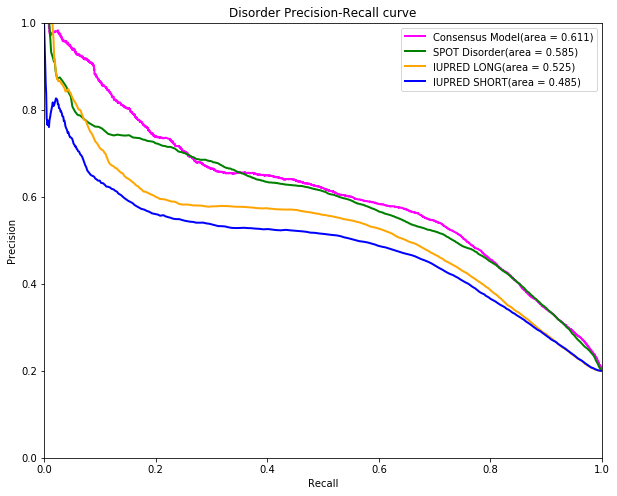

In [55]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature
fig = plt.figure(figsize=(10,8))
##############################################################################################
Score=Puri_Consensus
label=c
precision, recall, _ = precision_recall_curve(label, Score)
plt.plot(recall, precision, color='magenta',lw=2,label='Consensus Model(area = %0.3f)' % 0.611)
##############################################################################################
Score=Puri_Spot
label=c
precision, recall, _ = precision_recall_curve(label, Score)
plt.plot(recall, precision, color='g',lw=2,label='SPOT Disorder(area = %0.3f)' % 0.585)
##############################################################################################
Score=Puri_IUPL
label=c
precision, recall, _ = precision_recall_curve(label, Score)
plt.plot(recall, precision, color='orange',lw=2,label='IUPRED LONG(area = %0.3f)' % 0.525)
##############################################################################################
Score=Puri_IUPS
label=c
precision, recall, _ = precision_recall_curve(label, Score)
plt.plot(recall, precision, color='b',lw=2,label='IUPRED SHORT(area = %0.3f)' % 0.485)
##############################################################################################
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="upper right")
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Disorder Precision-Recall curve')
#plt.savefig('Disorder_PR.tiff', bbox_inches='tight',quality =95,orientation ='landscape',dpi =800)
plt.show()

In [56]:
len(Puri_IUPL)

103525

In [57]:
import random
import scipy
from sklearn.metrics import roc_auc_score
IUPL_AUC=[]
IUPS_AUC=[]
Spot_AUC=[]
Consensus_AUC=[]
g=0
for g in range(0,10,1):
       Random_50_Residues = random.sample(range(0,103525),65263)
       Disorder_Annotation=[]
       IUPL_Score=[]
       IUPS_Score=[]
       Spot_Score=[]
       Consensus_Score=[]
       b=0
       for b in Random_50_Residues:
                Disorder_Annotation.append(Puri_Disorder[b])
                IUPL_Score.append(Puri_IUPL[b])
                IUPS_Score.append(Puri_IUPS[b])
                Spot_Score.append(Puri_Spot[b])
                Consensus_Score.append(Puri_Consensus[b])                        
       iupl_auc=average_precision_score(Disorder_Annotation, IUPL_Score)
       iups_auc=average_precision_score(Disorder_Annotation, IUPS_Score)
       spot_auc=average_precision_score(Disorder_Annotation, Spot_Score)
       consensus_auc=average_precision_score(Disorder_Annotation,Consensus_Score)
       IUPL_AUC.append(iupl_auc)
       IUPS_AUC.append(iups_auc)
       Spot_AUC.append(spot_auc)
       Consensus_AUC.append(consensus_auc)

In [58]:
A=Consensus_AUC
B=IUPL_AUC
test_stat, critical_values, siglevel = scipy.stats.anderson(A, 'norm')
is_normal_A = test_stat < critical_values[2]
test_stat, critical_values, siglevel = scipy.stats.anderson(B, 'norm')
is_normal_B = test_stat < critical_values[2]
if is_normal_A and is_normal_B:
	# if both of them are normally distributed, we use t-test
	test_stat, p_val = scipy.stats.ttest_ind(A, B)
else:
	# else we do Anderson-Darling rank-sum test
	t_stat, p_val = scipy.stats.ranksums(A, B)
P_IUPL=p_val
############################################################################################################A=Consensus_AUC
A=Consensus_AUC
B=IUPS_AUC
test_stat, critical_values, siglevel = scipy.stats.anderson(A, 'norm')
is_normal_A = test_stat < critical_values[2]
test_stat, critical_values, siglevel = scipy.stats.anderson(B, 'norm')
is_normal_B = test_stat < critical_values[2]
if is_normal_A and is_normal_B:
	# if both of them are normally distributed, we use t-test
	test_stat, p_val = scipy.stats.ttest_ind(A, B)
else:
	# else we do Anderson-Darling rank-sum test
	t_stat, p_val = scipy.stats.ranksums(A, B)
P_IUPS=p_val
############################################################################################################A=Consensus_AUC
A=Consensus_AUC
B=Spot_AUC
test_stat, critical_values, siglevel = scipy.stats.anderson(A, 'norm')
is_normal_A = test_stat < critical_values[2]
test_stat, critical_values, siglevel = scipy.stats.anderson(B, 'norm')
is_normal_B = test_stat < critical_values[2]
if is_normal_A and is_normal_B:
	# if both of them are normally distributed, we use t-test
	test_stat, p_val = scipy.stats.ttest_ind(A, B)
else:
	# else we do Anderson-Darling rank-sum test
	t_stat, p_val = scipy.stats.ranksums(A, B)
P_Spot=p_val

In [59]:
print(P_IUPL)
print(P_IUPS)
print(P_Spot)

5.517844760352851e-24
3.1097002237352582e-27
6.759552247407202e-14


In [62]:
print(max(Puri_IUPL))
print(min(Puri_IUPL))
print(max(Puri_IUPS))
print(min(Puri_IUPS))
print(max(Puri_Spot))
print(min(Puri_Spot))
print(max(Puri_Consensus))
print(min(Puri_Consensus))

1.0
0.0
1.0
0.0
0.974
0.003
0.8627678
0.00022553565
